## Fastai Image classification Wild Cats


In [1]:
from fastai.vision import *
import fastai; fastai.__version__
import numpy as np

**Let's see how fastai handles MNIST**

In [2]:
# path = untar_data(URLs.MNIST_SAMPLE)
# data = ImageDataBunch.from_folder(path)
# learn = cnn_learner(data, models.resnet18, metrics=accuracy)
# learn.fit(1)

**Classify images of brown bears, panda bears, tigers, lions, and leopards**

In [3]:
# We can verify that we don’t have any corrupt images using the verify_images method.
import os
path = Path(r'../input/cats-family/cats')
for folder in ('cheetahs', 'jaguars', 'leopards','panthers','tigers'):
    print(folder)
    verify_images(os.path.join(path, folder), delete=True, max_size=700)

cheetahs


jaguars


leopards


panthers


tigers


In [11]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.33,
                                  ds_tfms=get_transforms(),bs=15 ,size=224, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [12]:
data.classes

['cheetahs', 'jaguars', 'leopards', 'panthers', 'tigers']

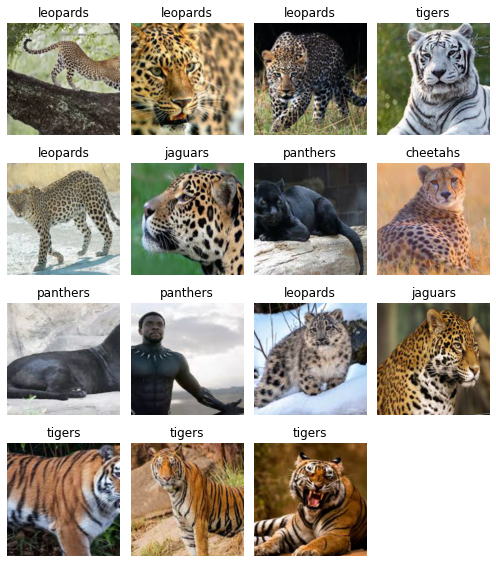

In [13]:
data.show_batch(rows=5, figsize=(7, 8))

In [14]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [15]:
# # defaults.device = torch.device('cuda') # makes sure the gpu is used
# learn.fit_one_cycle(3)

In [16]:
# # Will take too long without GPU
# learn.unfreeze() # must be done before calling lr_find
# learn.lr_find()
# learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.368468,1.518877,0.625000,00:07
1,2.893767,1.144588,0.562500,00:07
2,2.793835,0.888241,0.375000,00:07
3,2.593244,0.771999,0.187500,00:07
4,2.357496,0.773690,0.187500,00:06
5,2.318392,0.791630,0.312500,00:07


In [15]:
# learn.save('..animal-detection-stage-1')

## Interpretation

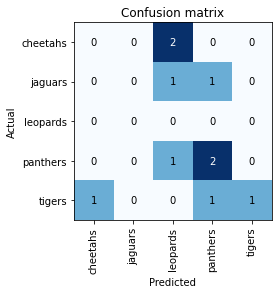

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

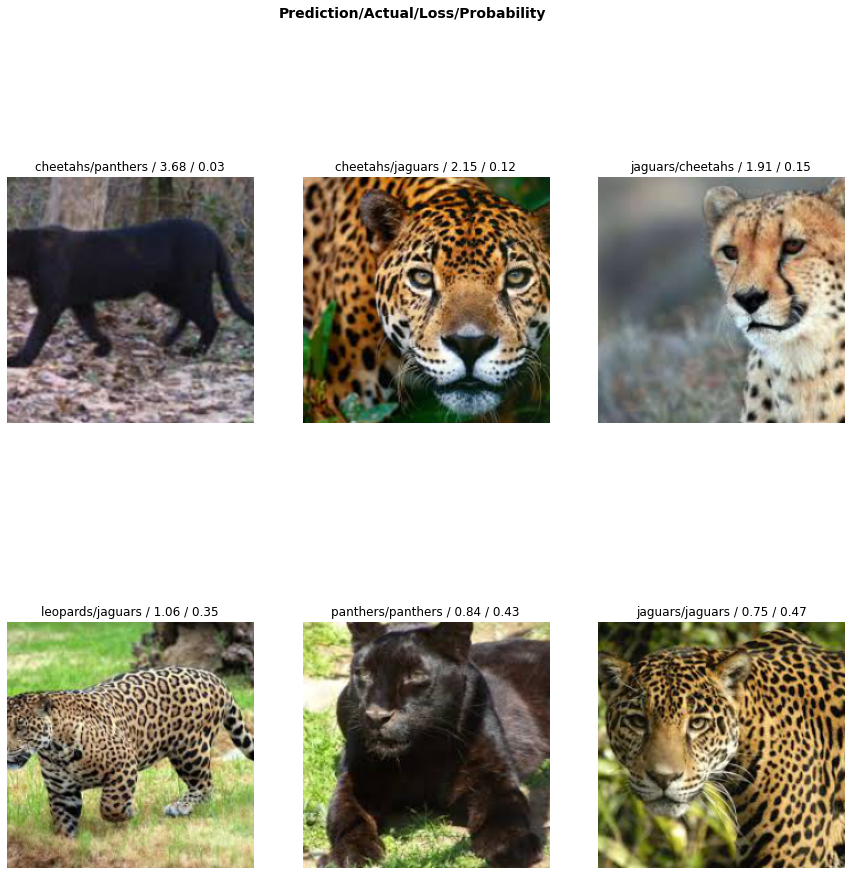

In [20]:
interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

In [21]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________